In [1]:
!wget -O GDP-data.json https://raw.githubusercontent.com/freeCodeCamp/ProjectReferenceData/master/GDP-data.json

--2021-01-17 15:12:39--  https://raw.githubusercontent.com/freeCodeCamp/ProjectReferenceData/master/GDP-data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13373 (13K) [text/plain]
Saving to: ‘GDP-data.json’

GDP-data.json       100%[===================>]  13.06K  --.-KB/s    in 0s      

2021-01-17 15:12:40 (39.5 MB/s) - ‘GDP-data.json’ saved [13373/13373]



In [20]:
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from pandas.io.json import json_normalize

with open('GDP-data.json') as json_data:
    data = json.load(json_data)

df = pd.DataFrame(data['data'])
df.head()

,0,1
0,1947-01-01,243.1
1,1947-04-01,246.3
2,1947-07-01,250.1
3,1947-10-01,260.3
4,1948-01-01,266.2


In [4]:
#label index name
df.index.name= 'S/N'

#rename column names
df.rename(columns={0:'date',1:'gdp'}, inplace=True)

df.head()


,date,gdp
S/N,,
0,1947-01-01,243.1
1,1947-04-01,246.3
2,1947-07-01,250.1
3,1947-10-01,260.3
4,1948-01-01,266.2


In [5]:
df['year'] = pd.DatetimeIndex(df['date']).year

df['month'] = pd.DatetimeIndex(df['date']).month

df.head()

,date,gdp,year,month
S/N,,,,
0,1947-01-01,243.1,1947,1
1,1947-04-01,246.3,1947,4
2,1947-07-01,250.1,1947,7
3,1947-10-01,260.3,1947,10
4,1948-01-01,266.2,1948,1


In [7]:
df['month'].replace(1, 'Q1', inplace=True)
df['month'].replace(4, 'Q2', inplace=True)
df['month'].replace(7, 'Q3', inplace=True)
df['month'].replace(10, 'Q4', inplace=True)

df.head()

,date,gdp,year,month
S/N,,,,
0,1947-01-01,243.1,1947,Q1
1,1947-04-01,246.3,1947,Q2
2,1947-07-01,250.1,1947,Q3
3,1947-10-01,260.3,1947,Q4
4,1948-01-01,266.2,1948,Q1


In [8]:
df['month'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

In [11]:
df[['year']]= df[['year']].astype('str')

df.dtypes

date      object
gdp      float64
year      object
month     object
dtype: object

In [15]:
df['Quarter'] = df['year'] + ' ' + df['month']

df.head()

,date,gdp,year,month,Quarter
S/N,,,,,
0,1947-01-01,243.1,1947,Q1,1947 Q1
1,1947-04-01,246.3,1947,Q2,1947 Q2
2,1947-07-01,250.1,1947,Q3,1947 Q3
3,1947-10-01,260.3,1947,Q4,1947 Q4
4,1948-01-01,266.2,1948,Q1,1948 Q1


In [21]:
newdf= df[['gdp', 'Quarter']]
newdf

,gdp,Quarter
S/N,,
0,243.1,1947 Q1
1,246.3,1947 Q2
2,250.1,1947 Q3
3,260.3,1947 Q4
4,266.2,1948 Q1
...,...,...
270,17522.1,2014 Q3
271,17615.9,2014 Q4
272,17649.3,2015 Q1


In [23]:
dates = range(len(df['Quarter']))

In [38]:
years = list(map(str, range(1947, 2015)))

In [25]:
!pip install mpldatacursor

ConversionError: Failed to convert value(s) to axis units: ['1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

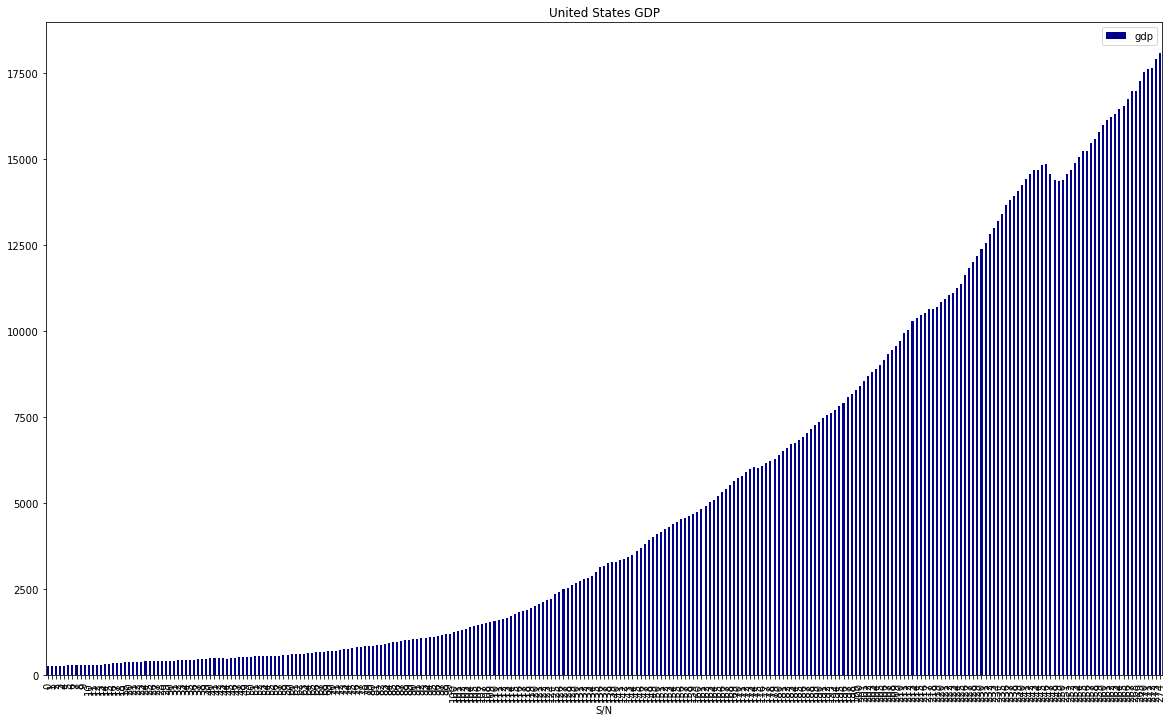

In [40]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

newdf.plot(kind= 'bar', figsize= (20,12), color='darkblue')

plt.title('United States GDP')
plt.xticks(years)
plt.xlabel('Date')
plt.ylabel('Gross Domestic Product')


plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'yticks'

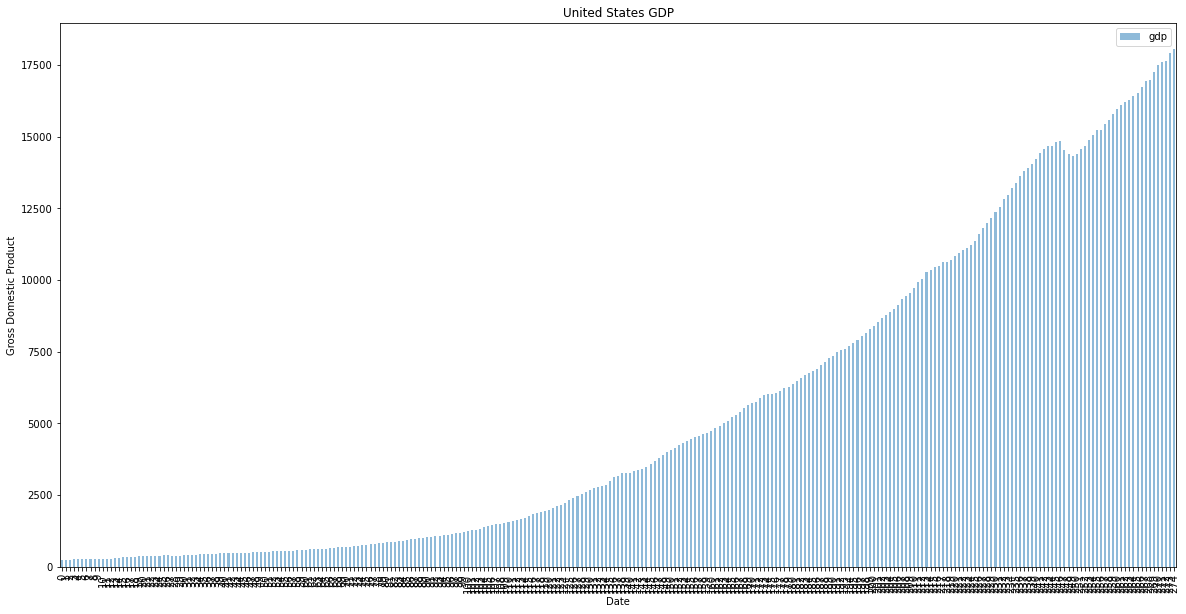

In [34]:
ax= newdf.plot(kind= 'bar', alpha=0.50, figsize=(20,10))


ax.set_title('United States GDP')
ax.set_xlabel('Date')
ax.set_ylabel('Gross Domestic Product')

ax.yticks(2000)


In [ ]:
# use the inline backend to generate the plots within the browser
%matplotlib inline
from mpldatacursor import datacursor #for tooltip
import bokeh.plotting as bk
from bokeh.models import HoverTool

newdf.plot(kind= 'bar', figsize= (20,12))

plt.title('United States GDP')
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Date')
plt.ylabel('Gross Domestic Product')

source = bk.ColumnDataSource(newdf)
hover = HoverTool(
    tooltips = [('Quarter')])

def formatter(**kwargs):
    dist = abs(np.array(dates) - kwargs['dates'])
    i = dist.argmin()
    labels = dates
    return '\n'.join(labels[i])

datacursor(hover=True, formatter=formatter)

plt.show()

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.barplot(x='year',y='gdp',data=newdf)
plt.show()


In [ ]:
##for consistency, ensure the column labels are of string type

all(isinstance(column, str) for column in newdf.columns)

In [ ]:
year = list(map(str, range(1947, 2015)))

In [ ]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

newdf.plot(kind= 'bar', figsize= (20,12))

plt.title('United States GDP')
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Date')
plt.ylabel('Gross Domestic Product')


plt.show()